<a href="https://colab.research.google.com/github/CarlosBrys/ProduccionYerbaMate/blob/main/EvolucionProduccionYerbaMate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Esto tiene formato de código
```

# **Evolucion de la Producción de Yerba Mate en Misiones**

Este proyecto utiliza algoritmos de aprendizaje de máquina para hallar correlaciones que permitan hacer predicciones producción de Yerba Mate, basados en el registro histórico de la producción 2007/2021.

**Total**: 180 registros

**Conjunto de datos**:
Datos estadísticos publicados por el INYM


**Modelo**: 
Regresión lineal polinómica. Se entra el modelo con grados 1 al 10


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy
from sklearn.metrics import r2_score
%matplotlib inline
import io
from google.colab import files
uploaded = files.upload()


Saving ProduccionYerba-1.csv to ProduccionYerba-1 (2).csv


In [52]:
DatosEntrenamiento = pd.read_csv(io.BytesIO(uploaded['ProduccionYerba-1.csv']))
#DatosEntrenamiento = pd.read_csv('https://raw.githubusercontent.com/CarlosBrys/ProduccionYerba/main/ProduccionYerba-.csv')
print(DatosEntrenamiento.head(5))


   Secuencia  Kilogramos
0          1       17880
1          2       17289
2          3       20270
3          4       18309
4          5       22279


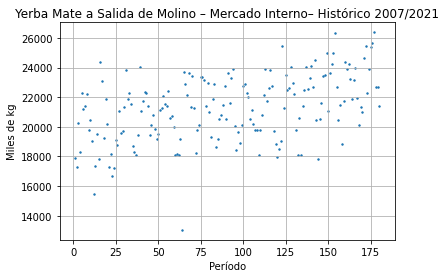

In [53]:
# Separar entre las variables de entrada (x) y salida (y) para el entrenamiento
X = DatosEntrenamiento.iloc[:, 0:-1].values
y = DatosEntrenamiento.iloc[:, -1].values

# Visualizar el conjunto de datos de entrenamiento
plt.title("Yerba Mate a Salida de Molino – Mercado Interno– Histórico 2007/2021")
plt.ylabel('Miles de kg')
plt.xlabel('Período')
plt.grid()
plt.scatter(X, y, s=2) # Datos observados
plt.show()

Grado= 1 : R^2= 0.20746883478894718


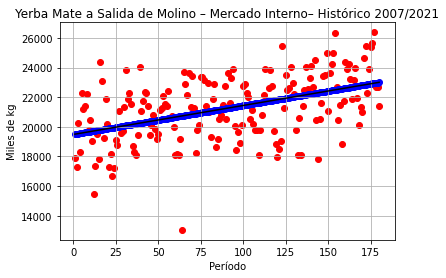

Grado= 2 : R^2= 0.2118553266400075


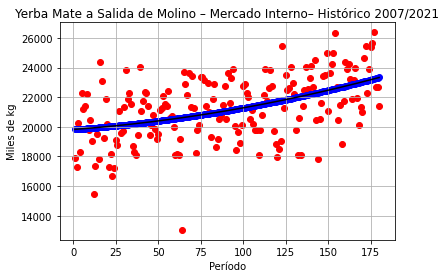

Grado= 3 : R^2= 0.2210209001604594


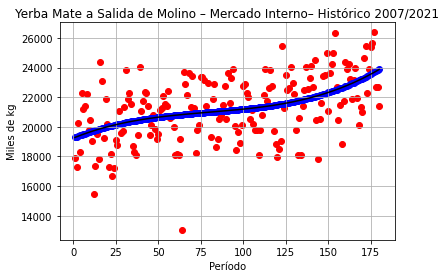

Grado= 4 : R^2= 0.22108027613652714


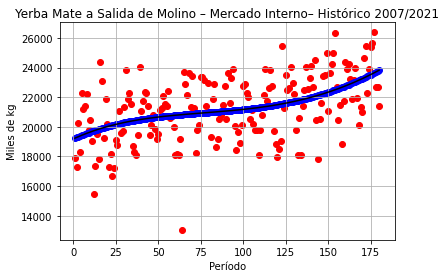

Grado= 5 : R^2= 0.22308488648929758


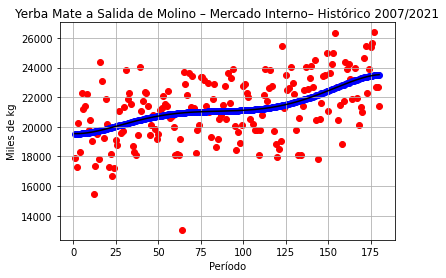

Grado= 6 : R^2= 0.22327936409213367


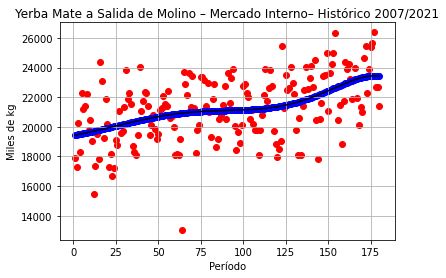

Grado= 7 : R^2= 0.22386659167405043


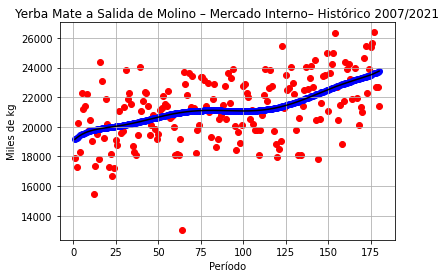

Grado= 8 : R^2= 0.2232700517862355


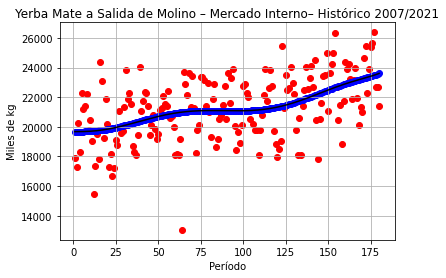

Grado= 9 : R^2= 0.22269042753245905


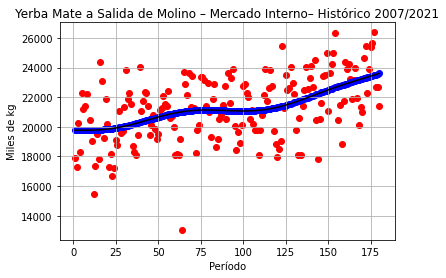

Grado= 10 : R^2= 0.22280458226028443


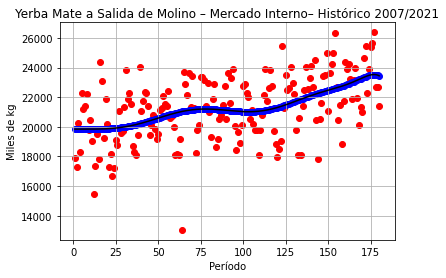

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.20746883],
       [ 2.        ,  0.21185533],
       [ 3.        ,  0.2210209 ],
       [ 4.        ,  0.22108028],
       [ 5.        ,  0.22308489],
       [ 6.        ,  0.22327936],
       [ 7.        ,  0.22386659],
       [ 8.        ,  0.22327005],
       [ 9.        ,  0.22269043],
       [10.        ,  0.22280458]])

In [46]:
# Se prueban polinomios de grado 3 al 10

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
soluciones = np.zeros(22)
soluciones.shape = (11,2)

for i in range(1,11):
  poly_reg = PolynomialFeatures(degree = i)
  X_poly = poly_reg.fit_transform(X)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y)
  y_pred = lin_reg.predict(X_poly)
  ValorR2E = r2_score(y,y_pred)
  soluciones[i,0] = i
  soluciones[i,1] = ValorR2E
  print("Grado=", i, ": R^2=", ValorR2E)
  X_grid = np.arange(min(X), max(X), 0.1)
  X_grid = X_grid.reshape((len(X_grid), 1))
  plt.scatter(X, y, color = 'red')
  plt.scatter(X, y_pred, color = 'blue')
  plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
  plt.title("Yerba Mate a Salida de Molino – Mercado Interno– Histórico 2007/2021")
  plt.ylabel('Miles de kg')
  plt.xlabel('Período')
  plt.grid()
  plt.show()

soluciones